In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('Data/Train_v2.csv')
test_data = pd.read_csv('Data/Test_v2.csv')
target = train_data['bank_account']


In [3]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])

#Separate training features from target
X_train = train_data.drop(['bank_account'], axis=1)
y_train = train_data['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [14]:
# function to preprocess our data from train models

def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float
    )
    
    # categorical features to be onverted to One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "job_type",
        "country",
        "education_level"
    ]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data

In [15]:
# preprocess the train data 
processed_train_data = preprocessing_data(X_train)
processed_test_data = preprocessing_data(test_data)

In [16]:
# the first train row
print(processed_train_data[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        1.        1.
  0.        0.        0.        0.        0.        0.        1.
  0.        0.       ]]


In [17]:
# shape of the processed train set
print(processed_train_data.shape)

(23524, 37)


In [20]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, Y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train, test_size = 0.1, random_state=42)

In [25]:
#import classifier algorithm here
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# create models
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()


#fitting the models
lg_model.fit(X_Train,Y_Train)
rf_model.fit(X_Train,Y_Train)
kn_model.fit(X_Train,Y_Train)
et_model.fit(X_Train,Y_Train)
xg_model.fit(X_Train,Y_Train)



[16:43:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_pred = kn_model.predict(X_val)
et_y_pred = et_model.predict(X_val)
xg_y_pred = xg_model.predict(X_val)

# Get error rate
print("Error rate Logistic Regression classifier: ", 1 - accuracy_score(y_val, lg_y_pred))
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of KNeighbors Classifier: ", 1 - accuracy_score(y_val, kn_y_pred))
print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_val, et_y_pred))
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_pred))

Error rate Logistic Regression classifier:  0.11219719507012327
Error rate of Random Forest classifier:  0.13769655758606036
Error rate of KNeighbors Classifier:  0.11857203569910757
Error rate of Extra Tree classifier:  0.14704632384190397
Error rate of XGB classifier:  0.10752231194220141


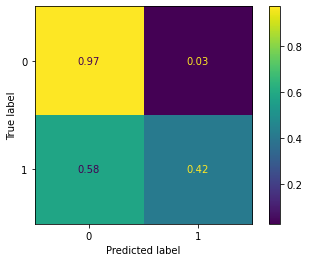

In [29]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix( xg_model,X_val, y_val,normalize='true')

In [31]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, Y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[18:01:18] WARNING: ..\src\learner.cc:573: 
Parameters: { "min_child_weighth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:01:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.6}


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score


# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, Y_Train)
y_pred = xgb_model.predict(X_val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

[18:01:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Error rate of the XGB classifier:  0.10922226944326396
